<h2>FIN5615 Project #2
    <p class="text-primary">Random Walk Simulaton (Part I)</p>
</h2>

<div class = "panel panel-success">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Project Introduction</b>
    </div>
    <div class = "panel-body"> 
    In this project we will try to address some of the shortcomings of modeling stock price as a simple random walk. We will compare the simulated option prices from our random walk model against that of the Black-Scholes options pricing formula.
    </div>
</div>
<div class = "panel panel-info">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Instructions</b>
    </div>
    <div class = "panel-body"> 
    Please code you solutions directly in this Notebook under each task in the cells provided below. Tasks are intended to be done in order with results from one task informing work in later tasks. Include all code used to produce your results, and support your answers with textual explanations if neccessary. <b>Any written text must be typed in a markdown cell to receive credit!</b> You may feel free to add additional Code and/or Markdown cells as needed. Code must be written using <b>Python 3</b>.
    <br><br>Please order the cells in your Notebook in the order in which they are intended to run! It is expected that your Notebook is able to run in sequence from start to finish without any errors (before submitting check by: <code>Kernel > Restart & Run All</code>).
    <br><br>Once ready, please submit your assignment as an <b>.ipynb file</b> (<code>File > Download as > Notebook</code>). You must name your files in the following format: <b><code>FIN5615_Project_1_Richard_Lee_tuc12345.ipynb</code></b>.
    </div>
</div>

---
<div class = "alert alert-block alert-warning">
    <b>Note</b>: Import all libraries that you plan on using in the code block below.
</div>

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import random

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 1</b>
    </div>
    <div class = "panel-body"> 
    Continue with the example of Ford (F) stock price from the end of Lecture 3. Assume that daily price movements of F follow a simple random walk, and that the price of F today is \$5.
    <ul>
        <li>Simulate the price of F over the next year (250 trading days) for 1000 trials.</li>
        <li>Plot the histogram of the probability distribution of F's stock price at the end of the year.</li>
    </ul>
    <br>Set the random seed to 5615 at the beginning of your code.
    <br><br>Your simulation should be a list of length 1000 (i.e. 1000 trials), with each element being a list of length 251 (i.e. price at time 0 plus 250 future time steps). Your histogram should have a bell shape and centered at approximately \$5.
    </div>
</div>

##### Q.No. 1.1 Simulate the price of F over the next year (250 trading days) for 1000 trials.
##### Answer:

In [68]:
### As Given,
random.seed(5615)


### Parameters
starting_value = 5  # Staring price of the stock
steps = 250  # Number of trading days 
trials = 1000  # Number of trials 

### List to store the price paths for each trial
sims = []

#### Simulate the random walk for each trial
for trial in range (trials):
    random_path = [starting_value]
    for step in range(steps):
        if random.random() < 0.5:
            price_change = 1  # Price increase by $1
        else:
            price_change = -1  # Price decrease by $ 1
        random_path.append(random_path[-1] + price_change)
    sims.append(random_path)   
print (len (sims))
print (len (sims [0]))

1000
251


##### Q.No. 1.2 Plot the histogram of the probability distribution of F's stock price at the end of the year
##### Answer

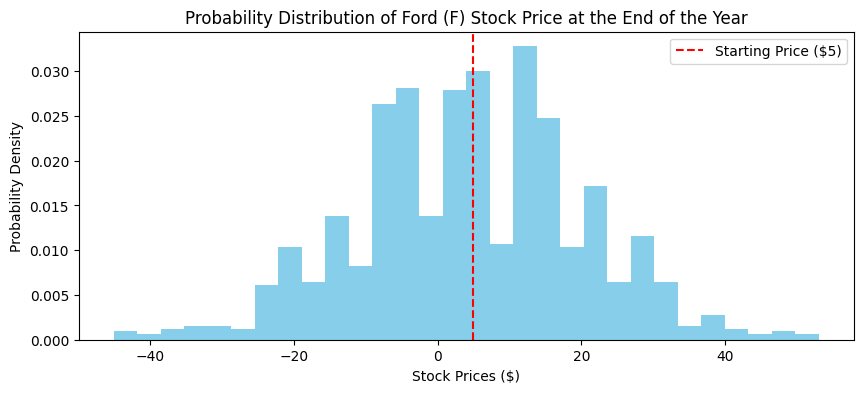

In [73]:
### Extract the final price at the end of the year for each trial
year_end_prices = [trial [-1] for trial in sims]

### Plotting the histogram of the year_end_prices 
plt.figure (figsize=(10, 4))
plt.hist(year_end_prices,color='skyblue', bins = 30, density=True)
plt.axvline(x=starting_value, color='red', linestyle='--', label='Starting Price ($5)')
plt.title ('Probability Distribution of Ford (F) Stock Price at the End of the Year')
plt.xlabel ('Stock Prices ($)')
plt.ylabel ('Probability Density')
plt.legend()
plt.show()

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 2</b>
    </div>
    <div class = "panel-body"> 
    One problem that arises when naively modeling stock price as a random walk is that simulated prices are not guarenteed to be positive. In the case of a simple random walk, we are assuming stock prices change by an arbitrary +\$1 or -\$1 at each time step.
    <br><br>Instead of assuming a price movement of +\$1 or -\$1, modify the random walk's possible price movement to be either +1% or -1% (equivalently, a mutiplicative factor of 1.01 or 0.99):
    <br><br>
    $$X_{t+1} = \left\{
        \begin{array}{ll}
            X_t \times 1.01 & \quad p = 0.5 \\
            X_t \times 0.99 & \quad p = 0.5
        \end{array}
    \right.$$
    <ul>
        <li>Simulate the price of F under this new dynamic over the next year (250 trading days) for 1000 trials.</li>
        <li>Plot a histogram of the probability distribution of F's stock price at the end of the year.</li>
        <li>Explain why making this adjustment prevents the stock price from becoming negative.</li>
    </ul>
    <br>Set the random seed to 5615 at the beginning of your code.
    <br><br>Your simulation should still have the same length as the previous task, but the histogram should now be skewed to the right.
    </div>
</div>

##### Q.No. 2.1 Simulate the price of F under this new dynamic over the next year (250 trading days) for 1000 trials.

In [76]:
### As Given,
random.seed(5615)

### Parameters
starting_value = 5  # Staring price of the stock
steps = 250  # Number of trading days 
trials = 1000  # Number of trials 

### List to store the price paths for each trial
sims = []

# Simulate the random walk with +1% or -1% price movement for each trial
for trial in range (trials):
    random_path = [starting_value]
    
    for step in range(steps):
        if random.random() < 0.5:
            price_change = 1.01  # +1% price change
        else:
            price_change = 0.99  # -1% price change
        random_path.append(random_path [-1] * price_change)
    sims.append(random_path)
print (len (sims))
print (len (sims[0]))

1000
251


##### Q.No. 2.2 Plot a histogram of the probability distribution of F's stock price at the end of the year.

##### Answer

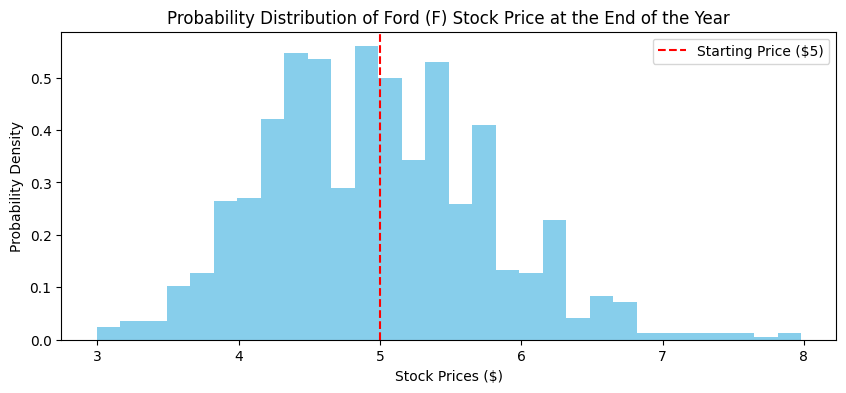

In [83]:
### Extract the final price at the end of the year for each trial
year_end_prices = [trial [-1] for trial in sims]

### Plotting the histogram of the year_end_prices 
plt.figure (figsize=(10, 4))
plt.hist(year_end_prices,color='skyblue', bins =30, density=True)
plt.axvline(x=starting_value, color='red', linestyle='--', label='Starting Price ($5)')
plt.title ('Probability Distribution of Ford (F) Stock Price at the End of the Year')
plt.xlabel ('Stock Prices ($)')
plt.ylabel ('Probability Density')
plt.legend()
plt.show()

##### Q.No. 2.3 Explain why making this adjustment prevents the stock price from becoming negative?
##### Answer:
In the original random walk, the stock price moved up or down by a fixed amount (+1 or -1). With several downward movements, this approach could result in negative prices, which is not realistic for stock markets.

By adjusting the model so the stock price changes by either +1% or -1%, we ensure that price stays positive. Because:
  - **Proportional Changes** : Instead of a fixed dollar change, the stock price moves    by a fraction of its current value. This means it's always multiplied by a positive factor i.e. 1.01 for an increas or 0.99 for a decrease, so the price cann't go below zero.
  - **Gradual Decline** : Even if the price repeatedly decreases, it shrinks in smaller steps as it approaches zero, but it never turns negative. This gradual reduction reflects the way real stock prices behave, where they can drop but can't go below zero.



<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 3</b>
    </div>
    <div class = "panel-body"> 
    Another issue with our current random walk model is that the magnitude of the stock price's movement is the same regardless of the frequency of our simulation.
    <br><br>For example, if we simulate quarterly increments, then the stock price can exhibit only 4 up or down movements of 1% within one year, whereas if we simulate in daily increments the stock price can have 250 up or down movements of 1% within one year, resulting in a much wider distribution of ending prices. This type of behavior is unreasonable.
    <br><br>We can try to remedy this by adjusting the magnitude of the stock price movement by the "step size" (h) of our simulation:
    <br><br>
    $$X_{t+1} = \left\{
        \begin{array}{ll}
            X_t \times (1 + 0.01\sqrt{h}) & \quad p = 0.5 \\
            X_t \times (1 - 0.01\sqrt{h}) & \quad p = 0.5
        \end{array}
    \right.$$
    <br>Under this new model specification, we can interpret 1% as the percentage movement in stock price over an annual period, and multiplying it by $\sqrt{h}$ scales it for the length of time for a single period of our simulated random walk, where $h = \frac{1}{steps}$. For example, under daily increments, $h = \frac{1}{250}$.
    <ul>
        <li>Simulate the price of F under this new dynamic over the next year (250 trading days) for 1000 trials.</li>
        <li>Plot a histogram of the probability distribution of F's stock price at the end of the year.</li>
    </ul>
    Set the random seed to 5615 at the beginning of your code.
    </div>
</div>

##### Q.No. 3.1 Simulate the price of F under this new dynamic over the next year (250 trading days) for 1000 trials.

##### Answer

In [89]:
### As Given,
random.seed(5615)

### Parameters
starting_value = 5  # Staring price of the stock
steps = 250  # Number of trading days 
trials = 1000  # Number of trial
h = (1/steps)  # Step size

### List to store the price paths for each trial
sims =[]

# Simulate the random walk with +1% or -1% price movement for each trial
for trial in range(trials):
    random_path = [starting_value]
    for step in range(steps):
        if random.random() < 0.5:
            price_change =  1 + (0.01 * np.sqrt(h))
        else:
            price_change = 1 - (0.01 * np.sqrt(h))
        random_path.append(random_path[-1] * price_change)
    sims.append(random_path)
print (len(sims))
print (len(sims[0]))

1000
251


##### Q.No. 3.2 Plot a histogram of the probability distribution of F's stock price at the end of the year.
##### Answer

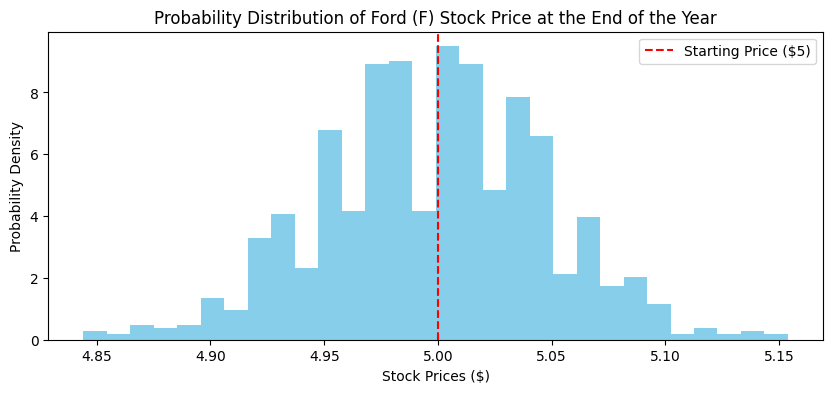

In [92]:
### Extract the final price at the end of the year for each trial
year_end_prices = [trial [-1] for trial in sims]

### Plotting the histogram of the year_end_prices 
plt.figure (figsize=(10, 4))
plt.hist(year_end_prices,color='skyblue', bins =30, density=True)
plt.axvline(x=starting_value, color='red', linestyle='--', label='Starting Price ($5)')
plt.title ('Probability Distribution of Ford (F) Stock Price at the End of the Year')
plt.xlabel ('Stock Prices ($)')
plt.ylabel ('Probability Density')
plt.legend()
plt.show()

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 4</b>
    </div>
    <div class = "panel-body"> 
    Another issue with our current random walk model is that our assumed annual magnitude of the stock price's movement is the same 1% regardless of the risk profile of the company. For example, an annual movement of 1% might seem reasonable for F, but definitely not for TSLA stock.
    <br><br>We can try to account for this by including the stock's annual volaility as another input parameter to our random walk simulation. Recall that the volatility is a measure of the disperson (a.k.a. standard deviation) on a stock's *continuously compounded returns*.
    <br><br>So, we can replace our arbitrary value of 1% with a change in the stock's return in that time step in terms of its annual volatility ($\sigma$), applied as continuously compounded factors, $u$ and $d$:
    <br><br>
    $$X_{t+1} = \left\{
        \begin{array}{ll}
            X_t \times u = X_te^{\sigma\sqrt{h}} & \quad p = 0.5 \\
            X_t \times d = X_te^{-\sigma\sqrt{h}} & \quad p = 0.5
        \end{array}
    \right.$$
    <br>Assume that the annual volatility of F's returns is 10%:
    <ul>
        <li>Simulate the price of F under this new dynamic over the next year (250 trading days) for 1000 trials.</li>
        <li>Calculate F's simulated annual rate of return for each of the 1000 trials. Plot this distribution of annual returns in a histogram.</li>
        <li>Calculate F's average simulated annual rate of return.</li> 
    </ul>
    Set the random seed to 5615 at the beginning of your code.
    <br><br>The histogram of simulated annual returns should be bell shaped with a mean of approximately 0%.
    </div>
</div>

##### Q.No. 4.1 Simulate the price of F under this new dynamic over the next year (250 trading days) for 1000 trials.
##### Answer

In [96]:
### As Given,
random.seed(5615)

### Parameters
starting_value = 5  # Staring price of the stock
steps = 250  # Number of trading days 
trials = 1000  # Number of trial
sigma = .1  # Annual Volatility
h = (1/steps)  # Step size

# Up and down factors based on volatility
u = np.exp(sigma * np.sqrt(h))
d = 1/u

### List to store the  final price for each trial
final_prices = []

# Simulate the random walk with volatility adjustment for each trial
for trial in range(trials):
    random_path = [starting_value]
    for step in range(steps):
        if random.random() < 0.5:
            price_change =  u
        else:
            price_change = d
        random_path.append(random_path[-1] * price_change)
    final_prices.append(random_path)
print (len(final_prices))
print (len(final_prices[0]))


1000
251


##### Q.No. 4.2 Calculate F's simulated annual rate of return for each of the 1000 trials. Plot this distribution of annual returns in a histogram.
##### Answer

In [27]:
# Extract the final price at the end of the year for each trial
ending_values = [float(final_price[-1]) for final_price in final_prices]

# Calculate F's simulated annual rate of return for each of the 1000 trials
rate_of_return = [(ending_value - starting_value) / starting_value for ending_value in ending_values]

len (rate_of_return)

1000

 - **Plotting this distribution of annual returns into a histogram.**

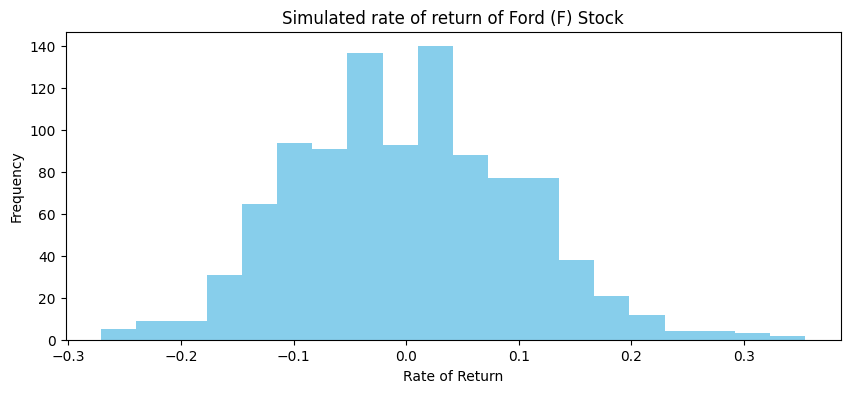

In [29]:
plt.figure (figsize=(10, 4))
plt.hist (rate_of_return, bins=20, color = 'skyblue')
plt.title ('Simulated rate of return of Ford (F) Stock')
plt.xlabel ('Rate of Return')
plt.ylabel ('Frequency')
plt.show()

##### Q.No. 4.3 Calculate F's average simulated annual rate of return.
##### Answer

In [31]:
average_annual_rate_of_return = float (np.mean (rate_of_return))
print (f'Hence, the average simulated annual rate of return is {average_annual_rate_of_return}.')


Hence, the average simulated annual rate of return is 0.0016874375378292585.


<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 5</b>
    </div>
    <div class = "panel-body"> 
    It is not very realistic to model 0% rates of return on stock prices. It is generally the investor's belief that stock prices will increase over time, although at what rate is unclear. For now, let's assume that the expected return on the stock is equal to the risk-free rate.
    <br><br>We can achieve this by adjusting the probabilities associated with an up or down movement in the stock price from 50% to a varying value of $p$, such that on average we receive the risk free rate of return (I will skip over the math here, but this is the idea of risk-neutral pricing):
    <br><br>
    $$X_{t+1} = \left\{
        \begin{array}{ll}
            X_t \times u = X_te^{\sigma\sqrt{h}} & \quad p = \frac{e^{rh} - d}{u - d} \\
            X_t \times d = X_te^{-\sigma\sqrt{h}} & \quad 1 - p
        \end{array}
    \right.$$ 
    <br>Notice that the value of $p$ is now set by a formula, and depends on the values of $u$ and $d$, which are just the multiplicative factors on the stock price that we defined previously.
    <br><br>Assume that the annual volatility of F's returns is 10% and a risk-free rate of 1%:
    <ul>
        <li>Simulate the price of F under this new dynamic over the next year (250 trading days) for 1000 trials.</li>
        <li>Plot a sample of 100 paths from the simulation on a single line plot. Your plot should look something like this:</li> 

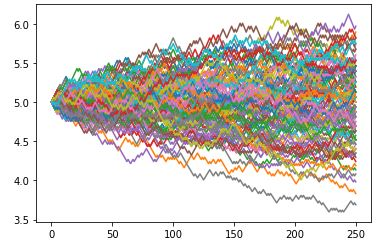
        <li>Calculate the average path for F's stock price over the 1000 trials. Plot this as a line plot.</li>
        <li>Calculate F's average simulated annual rate of return. Is it close to our assumed risk-free rate?</li>
    </ul>
    <br>Set the random seed to 5615 at the beginning of your code.
    <br><br>Note that the values for $u$, $d$, and $p$ do not vary by time step. Check that they are approximately equal to 1.0063, 0.9937, and 0.5016, respectively.
    </div>
</div>

##### Q.No. 5.1 Simulate the price of F under this new dynamic over the next year (250 trading days) for 1000 trials.
##### Answer

In [34]:
### As Given,
random.seed(5615)

### Parameters
starting_value = 5  # Staring price of the stock
steps = 250  # Number of trading days 
trials = 1000  # Number of trial
sigma = .1  # Annual Volatility
r = 0.01  # Risk Free Rate
h = (1/steps)  # Step size

# Up and down factors based on volatility
u = np.exp(sigma * np.sqrt(h))
d = 1/u

#Risk-neutral probability
p = (np.exp(r * h) - d) / (u - d)

### List to store the  final price for each trial
final_prices = []

for trial in range (trials):
    random_path = [starting_value]
    for step in range (steps):
        if random.random() < p:
            price_change = u
        else:
            price_change = d
        random_path.append(random_path[-1] * price_change)
    final_prices.append(random_path)


In [35]:
len (final_prices)

1000

In [36]:
len (random_path)

251

##### Q.No. 5.2 Plot a sample of 100 paths from the simulation on a single line plot.
##### Answer

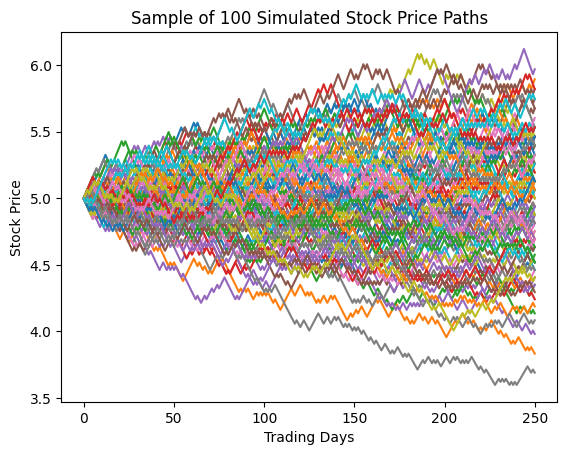

In [38]:
plt.title ('Sample of 100 Simulated Stock Price Paths')
plt.xlabel ('Trading Days')
plt.ylabel ('Stock Price')

for i in range (100):
    plt.plot(final_prices[i])
plt.show()

##### Q.No. 5.3 Calculate the average path for F's stock price over the 1000 trials. Plot this as a line plot.
##### Answer

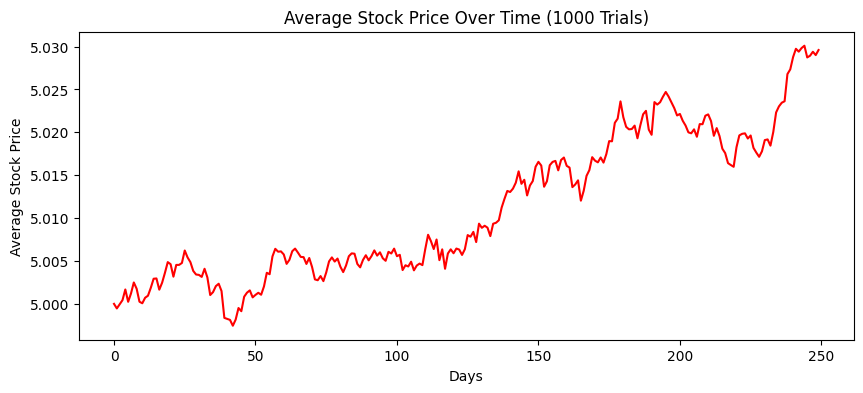

In [40]:
average_path = []
for step in range (steps):
    average_price = np.mean([price[step]for price in final_prices])
    average_path.append(average_price)

# Plot the average path
plt.figure(figsize = (10,4))
plt.plot(average_path, color = 'red')
plt.title('Average Stock Price Over Time (1000 Trials)')
plt.xlabel('Days')
plt.ylabel('Average Stock Price')
plt.show()

##### Q.No. 5.4 Calculate F's average simulated annual rate of return. Is it close to our assumed risk-free rate?
##### Answer

In [42]:
# Extract the final price at the end of the year for each trial
ending_values = [float(final_price[-1]) for final_price in final_prices]

# Calculating avergae final price
average_final_price = np.mean(ending_values)

# Calculating the simulated annual rate of return
simulated_annual_return = (average_final_price / starting_value) - 1

# Final Output
print(f'Average simulated annual rate of return: {simulated_annual_return * 100:.2f}%')
print(f'Assumed risk-free rate: {r * 100:.2f}%')


Average simulated annual rate of return: 0.64%
Assumed risk-free rate: 1.00%


**Decision** : The simulated annual rate of return is 0.64%, which is **not very close** to the assumed risk-free rate of 1%. There is a difference of 0.36 percentage points. While the deviation is relatively small, it indicates that the simulated return is slightly below the expected risk-free rate. This could be due to the stochastic nature of the simulation, where random price movements can cause some variation in the outcome, but it's still within a reasonable range for a simulation.